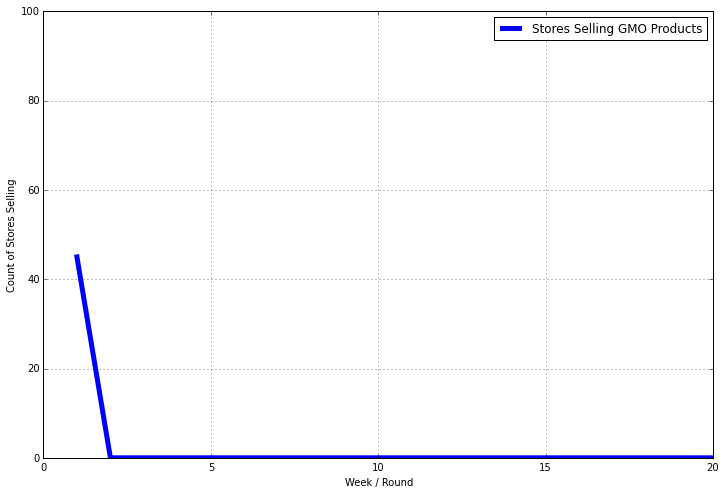

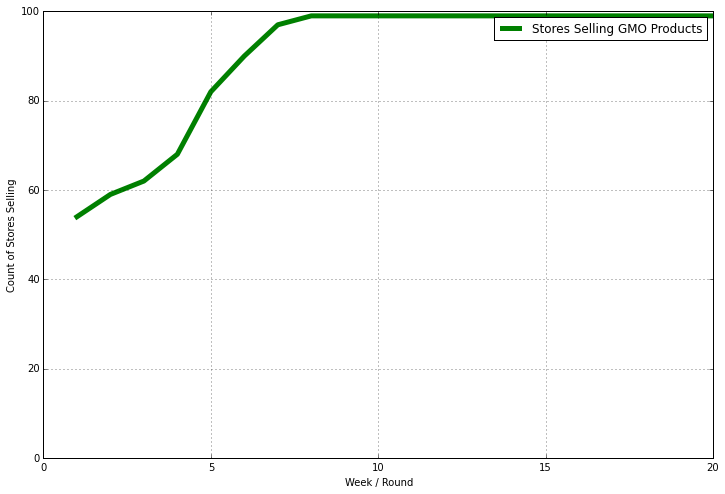

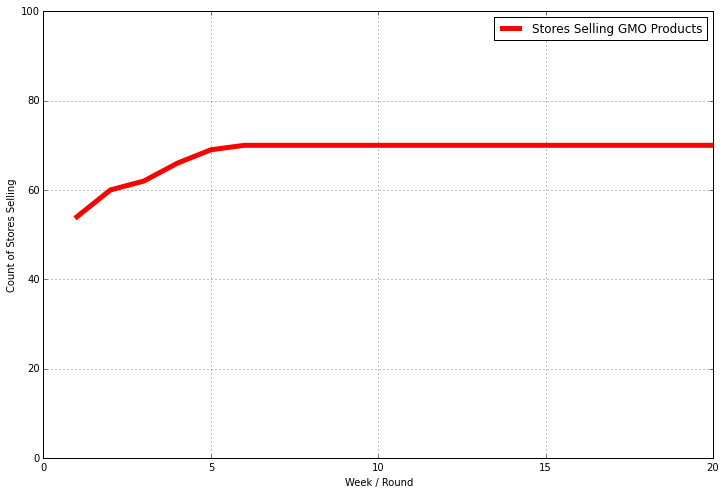

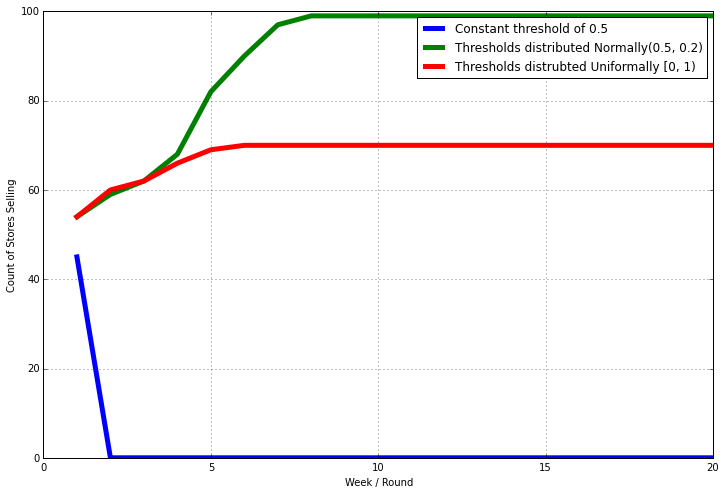

In [37]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline


DEFAULT_HORIZONTAL_SIZE = 12
DEFAULT_VERTICAL_SIZE = 8
DEFAULT_DPI = 800
MIN_THRESHOLD = 0.0
MAX_THRESHOLD = 1.0
DEFAULT_WIDTH = 5
DEFAULT_COLOR = 'blue'


class GameTheorySimulation(object):
    def __init__(self, agent_factory, agent_count, num_rounds, 
                 initial_proportion=None, color=DEFAULT_COLOR):
        
        self.agent_factory = agent_factory
        self.agent_count = agent_count
        self.num_rounds = num_rounds
        self.initial_proportion = initial_proportion
        self.color = color
        self.results = []

        self.agents = [self.agent_factory() for i in xrange(self.agent_count)]

    def simulate(self):
        previous_proportion = self.initial_proportion
        for round in xrange(self.num_rounds):
            sell_count = [agent.simulate(previous_proportion) for agent in self.agents].count(True)
            self.results.append(sell_count)
            previous_proportion = float(sell_count) / self.agent_count
            
    def graph(self):
        plot.figure(figsize=(DEFAULT_HORIZONTAL_SIZE, DEFAULT_VERTICAL_SIZE),
                dpi=DEFAULT_DPI)
    
        # +1 for weeks 1 to n (without week zero)
        x_values = np.arange(1, self.num_rounds + 1)
        y_values = self.results
        
        plot.plot(x_values, y_values, linewidth=DEFAULT_WIDTH, 
                  color=self.color, label='Stores Selling GMO Products')
    
        plot.legend(loc='best')
        plot.ylim([0, self.agent_count])
        plot.xlabel('Week / Round')
        plot.ylabel('Count of Stores Selling')
        plot.grid(True)
        plot.show()
        
    def simulate_and_graph(self):
        self.simulate()
        self.graph()


class SimulationAgent(object):
    def __init__(self, threshold_proportion):
        self.threshold_proportion = np.clip(threshold_proportion, 
                                            MIN_THRESHOLD, MAX_THRESHOLD)

    def simulate(self, previous_proportion):
        # If no previous proportion given, randomize - week 1
        if previous_proportion is None:
            previous_proportion = np.random.uniform(MIN_THRESHOLD, MAX_THRESHOLD)

        return previous_proportion >= self.threshold_proportion


class ConstantThresholdAgentFactory(object):
    def __init__(self, threshold_proportion):
        self.threshold_proportion = threshold_proportion

    def __call__(self, *args, **kwargs):
        return SimulationAgent(self.threshold_proportion)


class DistributionAgentFactory(object):
    def __init__(self, distribution, **sample_parameters):
        self.distribution = distribution
        self.sample_parameters = sample_parameters

    def __call__(self, *args, **kwargs):
        return SimulationAgent(self.distribution(**self.sample_parameters))

    
def graph_several(result_pairs, simulation_length, agent_count):
    plot.figure(figsize=(DEFAULT_HORIZONTAL_SIZE, DEFAULT_VERTICAL_SIZE),
            dpi=DEFAULT_DPI)

    # +1 for weeks 1 to n (without week zero)
    x_values = np.arange(1, simulation_length + 1)
    
    for results, label in result_pairs:
        plot.plot(x_values, results, linewidth=DEFAULT_WIDTH, label=label)

    plot.legend(loc='best')
    plot.ylim([0, agent_count])
    plot.xlabel('Week / Round')
    plot.ylabel('Count of Stores Selling')
    plot.grid(True)
    plot.show()


AGENT_COUNT = 100
ROUNDS = 20

    
def main():

    constant_sim = GameTheorySimulation(ConstantThresholdAgentFactory(0.5), 
                                        AGENT_COUNT, ROUNDS)
    constant_sim.simulate_and_graph()
    
    normal_sim = GameTheorySimulation(
        DistributionAgentFactory(np.random.normal, loc=0.5, scale=0.2), 
        AGENT_COUNT, ROUNDS, color='green')
    normal_sim.simulate_and_graph()
    
    uniform_sim = GameTheorySimulation(
        DistributionAgentFactory(np.random.uniform, low=0, high=1), 
        AGENT_COUNT, ROUNDS, color='red')
    uniform_sim.simulate_and_graph()
    
    graph_several(
        [(constant_sim.results, 'Constant threshold of 0.5'),
         (normal_sim.results, 'Thresholds distributed Normally(0.5, 0.2)'),
         (uniform_sim.results, 'Thresholds distrubted Uniformally [0, 1)')],
        ROUNDS, AGENT_COUNT)

main()